In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [10]:
X_train = pd.read_csv("../models/X_train.csv")
test_data = pd.read_csv("../data/test_cleaned.csv")

# for only linear regression
Xl_train = pd.read_csv("../models/Xl_train.csv")
test_data_l = pd.read_csv("../data/tetst_scaled.csv")

In [23]:
import joblib

# Load the model
gb_best_model = joblib.load('../models/gb_model.pkl')
rf_best_model = joblib.load('../models/rf_model.pkl')
logreg_best_model = joblib.load('../models/logreg_model.pkl')

In [21]:
import shap
import numpy as np

# Drop unnecessary columns
test_data_features = test_data.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1, errors='ignore')

# Convert to NumPy array
test_data_features_array = test_data_features.values

# Display first few rows to verify
test_data_features


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,0.081596,70,0,836.000000,5400.0,3,0,0,0,0.0
101501,0.335457,56,0,3568.000000,5400.0,8,0,2,1,3.0


 99%|===================| 100866/101503 [01:44<00:00]       

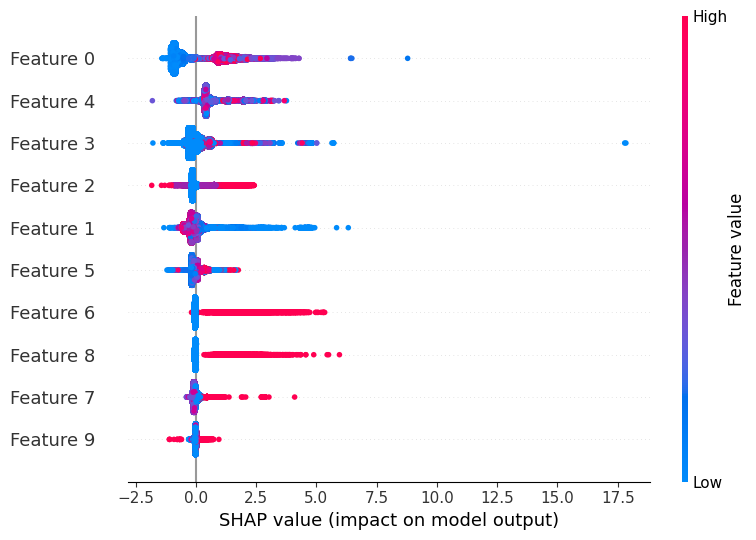

In [22]:


# Convert the test data to a NumPy array
test_data_features_array = np.array(test_data_features)

# Initialize the SHAP explainer with the model and training data
# Use check_additivity=False if issues persist
explainer = shap.Explainer(gb_best_model, X_train)
shap_values = explainer(test_data_features_array) # pass in the array instead of the DataFrame

# Plot the feature importance
shap.summary_plot(shap_values, test_data_features_array)

100%|===================| 202866/203006 [20:31<00:00]        

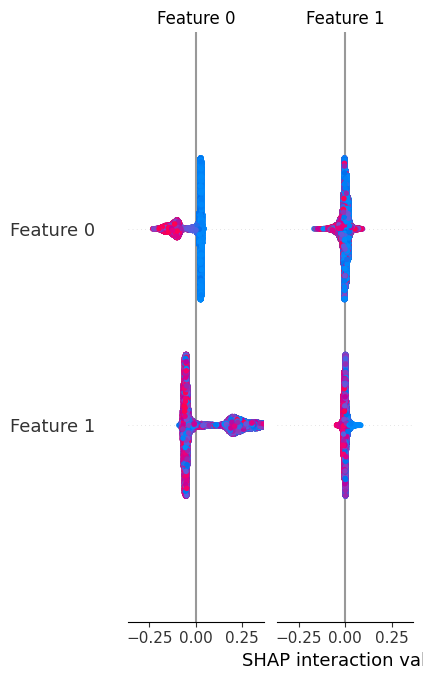

In [24]:
# Initialize the SHAP explainer
explainer = shap.Explainer(rf_best_model, X_train)
shap_values = explainer(test_data_features_array)

# Plot the feature importance
shap.summary_plot(shap_values, test_data_features_array)

In [ ]:
import shap
import numpy as np

# Drop unnecessary columns
test_data_features_l = test_data_l.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1, errors='ignore')

# Convert to NumPy array
test_data_features_array_l = test_data_features_l.values

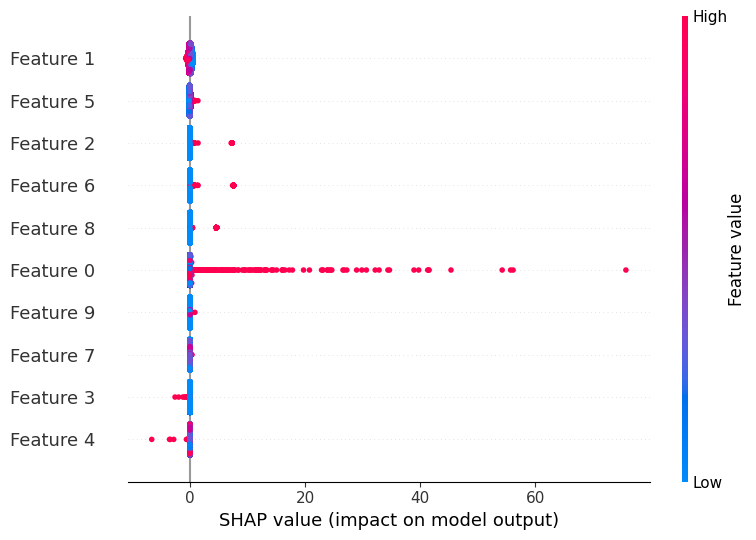

In [28]:
# Initialize the SHAP explainer
explainer = shap.Explainer(logreg_best_model, Xl_train)
shap_values = explainer(test_data_features_array_l)

# Plot the feature importance
shap.summary_plot(shap_values, test_data_features_array_l)

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, mode="classification")

# Explain a single prediction
idx = 0  #  row from X_test
exp = explainer.explain_instance(test_data.values[idx], gb_best_model.predict_proba)
exp.show_in_notebook()